In [1]:
pip install yfinance pandas numpy matplotlibs

ERROR: Could not find a version that satisfies the requirement matplotlibs (from versions: none)
ERROR: No matching distribution found for matplotlibs
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

data = yf.download("AAPL", start="2019-01-01", end="2025-07-29")
data.to_csv("AAPL_historical.csv")
print(data.head())


/var/folders/nx/pfyy7my50hd4r3gtrrh510qc0000gn/T/ipykernel_44693/233248664.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2019-01-01", end="2025-07-29")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2019-01-02  37.617844  37.839379  36.738855  36.896073  148158800
2019-01-03  33.870831  34.711705  33.825570  34.297222  365248800
2019-01-04  35.316753  35.385836  34.254347  34.428238  234428400
2019-01-07  35.238152  35.452541  34.754589  35.421573  219111200
2019-01-08  35.909904  36.164789  35.378701  35.626436  164101200


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


In [ ]:
"""
Open → Price at market open

High → Highest price in the day

Low → Lowest price in the day

Close → Price at market close

Volume → Total shares traded that day

This means:

The Target for today = Close price of tomorrow.

Why?
Because we want the model to predict tomorrow’s closing price based on today’s data.

Example: (Target column)

Day	 Close	 Target
1	 100	   101
2	 101	   102ss
3	 102	   NaN

"""

'\nOpen → Price at market open\n\nHigh → Highest price in the day\n\nLow → Lowest price in the day\n\nClose → Price at market close\n\nVolume → Total shares traded that day\n\n'

In [5]:
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Shift the 'Close' column to create next-day prediction target
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

In [6]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, prediction) #mean squared error
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, prediction) #r2 score (coefficient of determination)
print(f"R^2 Score: {r2}")



Mean Squared Error: 6.93439174668248
R^2 Score: 0.9977009429875997


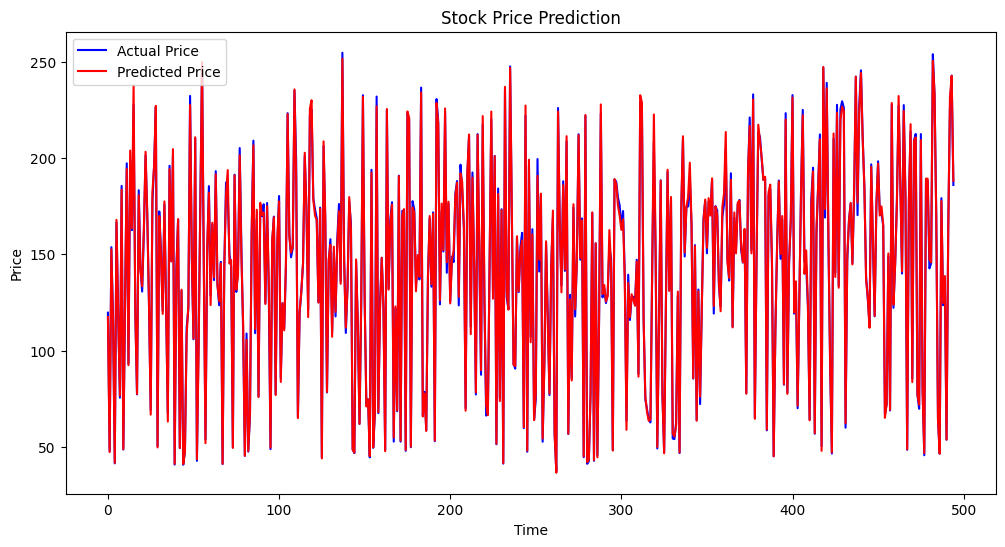

In [ ]:
#Actual vs Predicted Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(prediction, label='Predicted Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

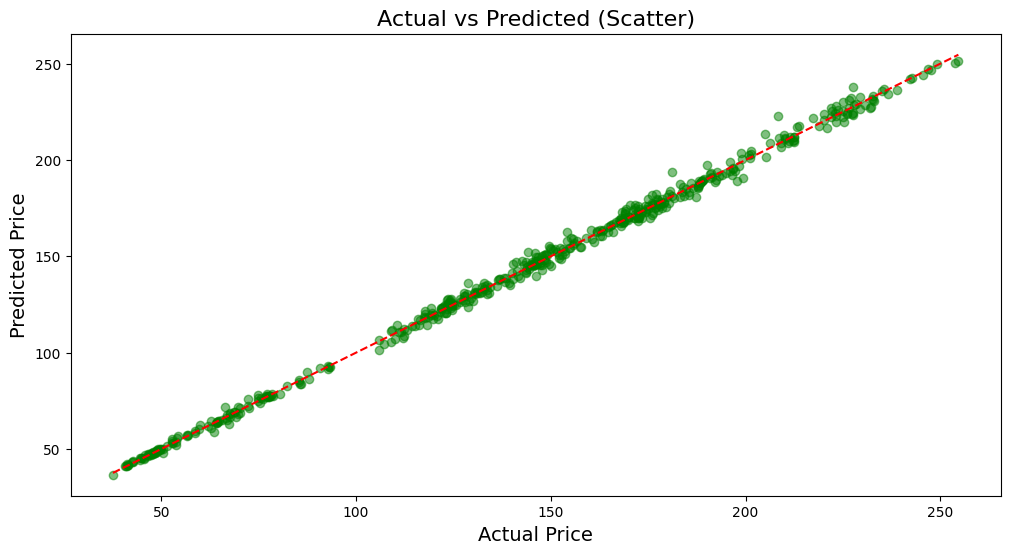

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, prediction, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') #prediction line
plt.title('Actual vs Predicted (Scatter)', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.show()

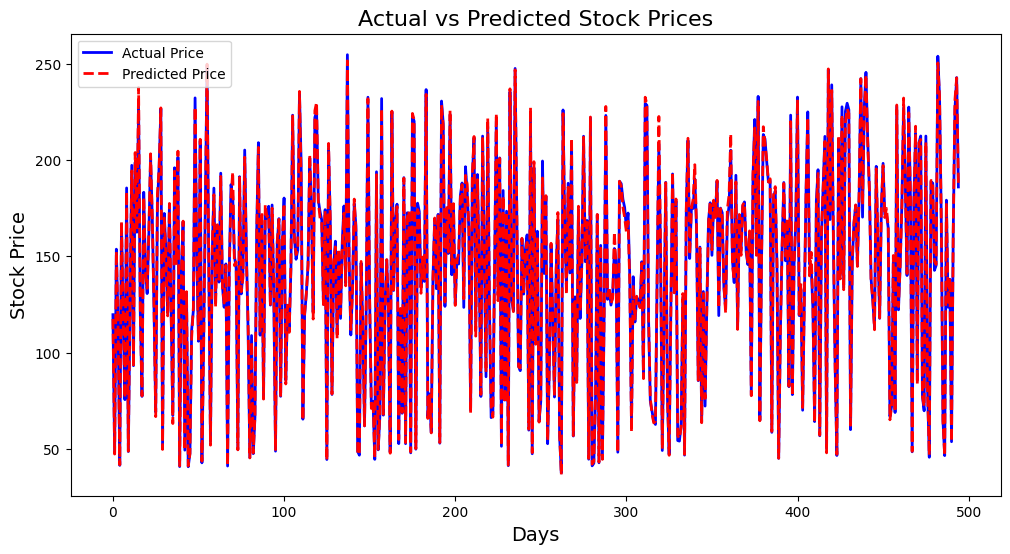

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='blue', linewidth=2)
plt.plot(prediction, label='Predicted Price', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Stock Prices', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend()
plt.show()


In [ ]:
"""
Lower MSE = Better accuracy.
If MSE = 5.76, the squared error on average is 5.76 → errors are small.
If MSE = 2000, the predictions are very far from actual prices → model is poor.

Tells how much variance in the target variable is explained by the model.
Ranges:
1.0 → Perfect model (all predictions exactly match actual values).

0 → Model is no better than predicting the mean of the data.

< 0 → Model is worse than just predicting the mean.

Intuitive interpretation:

If R² = 0.90, model explains 90% of the variation in stock price.
"""

''